In [ ]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sea

Inicialmente iremos ler o arquivo csv através do read para que tenhamos um database.

In [ ]:
walmart = pd.read_csv ('Walmart.csv')
walmart.drop(['Fuel_Price','CPI'], inplace=True, axis=1)
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,8.106
1,1,12-02-2010,1641957.44,1,38.51,8.106
2,1,19-02-2010,1611968.17,0,39.93,8.106
3,1,26-02-2010,1409727.59,0,46.63,8.106
4,1,05-03-2010,1554806.68,0,46.50,8.106
...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,8.684
6431,45,05-10-2012,733455.07,0,64.89,8.667
6432,45,12-10-2012,734464.36,0,54.47,8.667
6433,45,19-10-2012,718125.53,0,56.47,8.667


Agora iremos fazer o procedimento de tratamento dos dados, então vamos primeiramente eliminar os valores nulos.


In [ ]:
walmart = walmart.dropna(axis = 0, how ='any')
walmart['Date'] = walmart['Date'].replace('-', '', regex=True)
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Unemployment
0,1,05022010,1643690.90,0,42.31,8.106
1,1,12022010,1641957.44,1,38.51,8.106
2,1,19022010,1611968.17,0,39.93,8.106
3,1,26022010,1409727.59,0,46.63,8.106
4,1,05032010,1554806.68,0,46.50,8.106
...,...,...,...,...,...,...
6430,45,28092012,713173.95,0,64.88,8.684
6431,45,05102012,733455.07,0,64.89,8.667
6432,45,12102012,734464.36,0,54.47,8.667
6433,45,19102012,718125.53,0,56.47,8.667


Verificamos que não tem nenhum objeto do database que possui um valor nulo.
E agora vamos ver se temos outliers que não fazem sentido para nós.


Encontramos alguns outliers, não são muito, porém podemos eliminar valores menores que 5 ja que são dias muito específicos

In [ ]:
np.where(walmart['Temperature']<5)
walmart.drop([910], axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


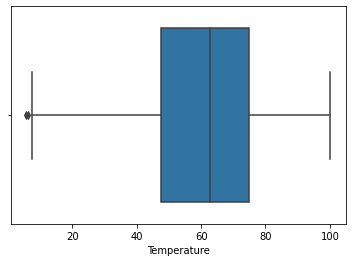

In [ ]:
sea.boxplot(walmart['Temperature'])

Eliminamos o único outlier representativo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


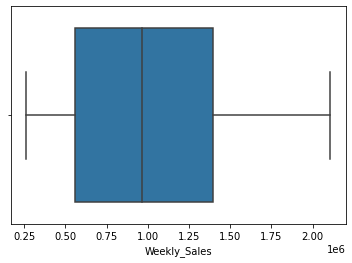

In [ ]:
media = walmart.groupby('Store')['Weekly_Sales'].mean()
sea.boxplot(media)

Podemos perceber que as 25% melhores médias de vendas por semana estão com vendas acima de 1.135x10^6.

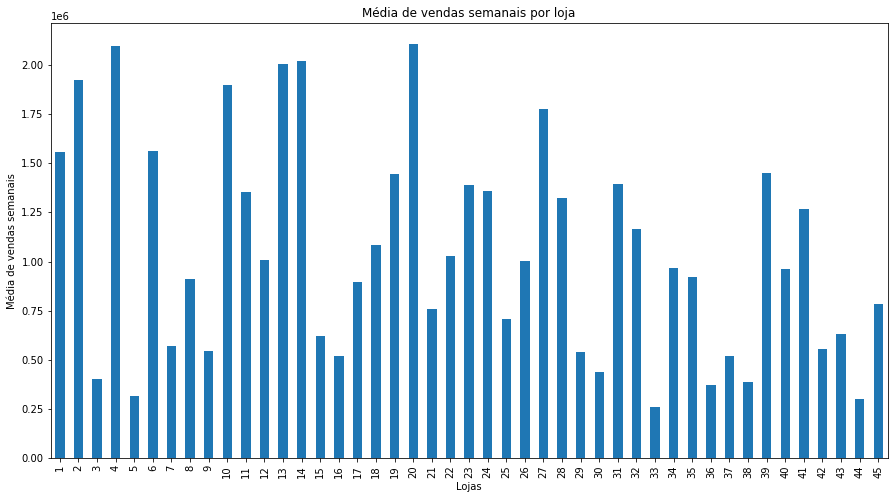

In [ ]:
media.plot(kind='bar', title='Média de vendas semanais por loja', ylabel='Média de vendas semanais',xlabel='Lojas', figsize=(15, 8))

Podemos ver que temos 6 lojas que se destacam entre as outras na média de vendas por semana, elas são a loja 2,4,10,13,14,20. Essa é uma informação muito importante para sabermos qual loja vale a pena investir em uma expansão.

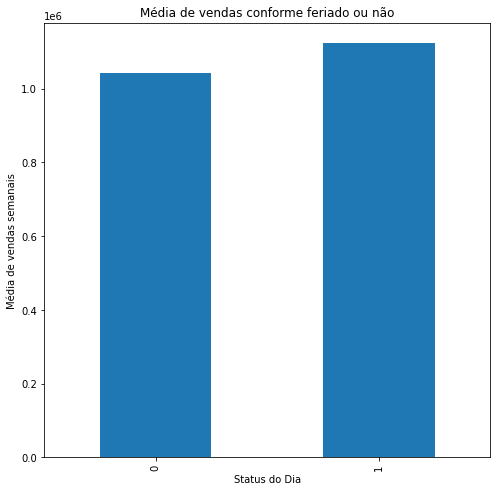

In [ ]:
vendas_feriado = walmart.groupby('Holiday_Flag')['Weekly_Sales'].mean()
vendas_feriado.plot(kind='bar', title='Média de vendas conforme feriado ou não', ylabel='Média de vendas semanais',xlabel='Status do Dia', figsize=(8, 8))

Nós podemos notar ali no gráfico de temos uma pequena tendência em ter um aumento nas vendas em semanas que possuem feriados, isso acredito que seja uma tendência de qualquer comercio varejista, porém não é muito relevante.

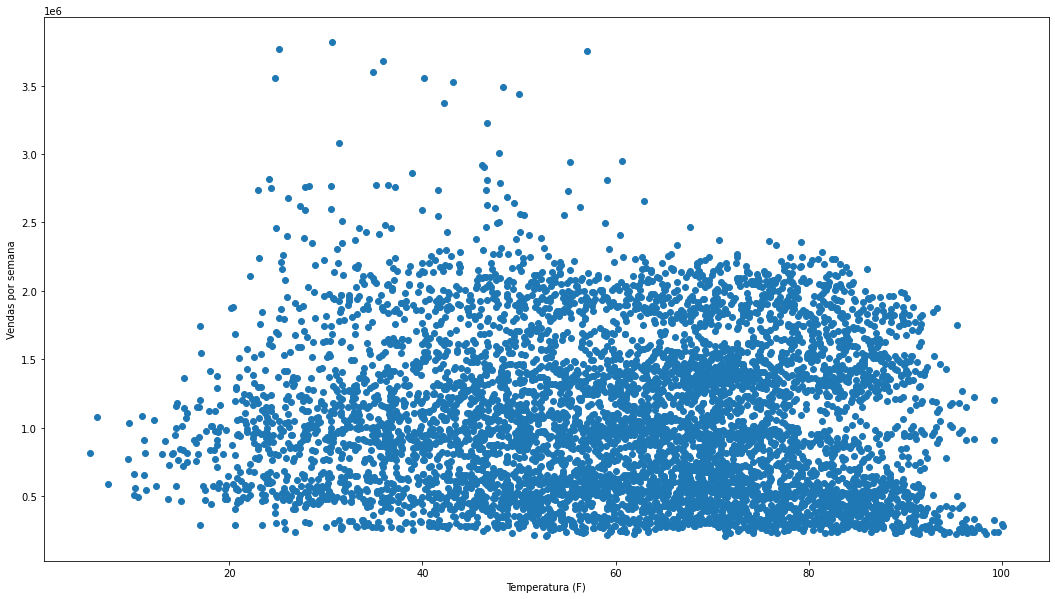

In [ ]:
fig, ax = plot.subplots(figsize = (18,10))
ax.scatter(walmart['Temperature'], walmart['Weekly_Sales'])
 
# x-axis label
ax.set_xlabel('Temperatura (F)')
 
# y-axis label
ax.set_ylabel('Vendas por semana')
plot.show()

Vemos que não temos a temperatura como parametro, pois temos vendas destoantes desde 20F que é uma temperatura muito baixa e também as 60F. apenas quando está um frio muito grande como < 20F que realmente temos uma queda nas vendas.

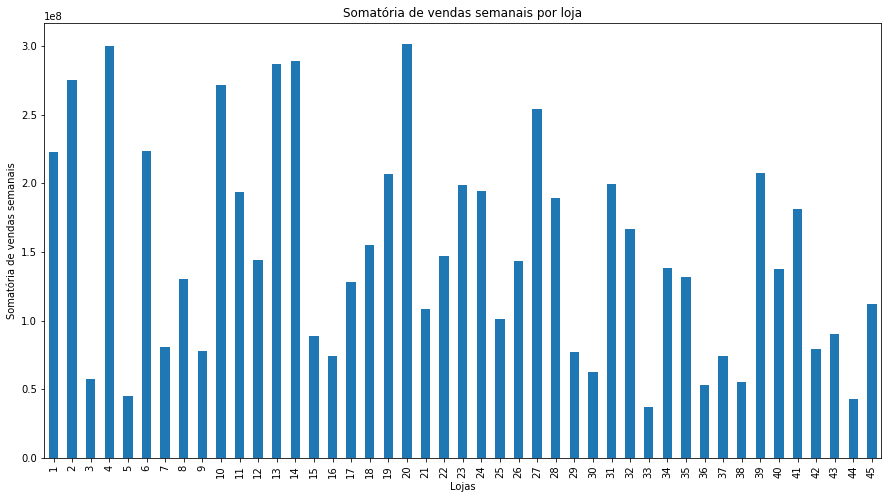

In [ ]:
media_vendas=walmart['Weekly_Sales'].mean()
somatoria = walmart.groupby('Store')['Weekly_Sales'].sum()
somatoria.plot(kind='bar', title='Somatória de vendas semanais por loja', ylabel='Somatória de vendas semanais',xlabel='Lojas', figsize=(15, 8))

In [ ]:
somatoria

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.104025e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

Com apenas o gráfico ficamos em dúvida se era a loja 4 ou a loja 20 quem mais vendeu durante todo o percurso, descobrimos que é a loja 20 após o tira teima na nossa tabela de somatórias. Apartir desse conhecimento partimos do principio que apostamos no time que está ganhando, então quem ganhará uma expansão de loja será a loja 20 pela sua boa gestão.